# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at Discount Motors, a used car dealership in the UK. The dealership is expanding and has hired a large number of junior salespeople. Although promising, these junior employees have difficulties pricing used cars that arrive at the dealership. Sales have declined 18% in recent months, and management would like your help designing a tool to assist these junior employees.

To start with, they would like you to work with the Toyota specialist to test your idea(s). They have collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

You will need to present your findings in two formats:
- You must submit a written report summarising your analysis to your manager. As a data science manager, your manager has a strong technical background and wants to understand what you have done and why. 
- You will then need to share your findings with the head of sales in a 10 minute presentation. The head of sales has no data science background but is familiar with basic data related terminology. 

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

In [ ]:
# We start by importing the necessary libraries for the initial analysis:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## I. Reading & Preprocessing Data

In this section we load the data into a dataframe, explore it using basic dataframe methods and exclude some of the rows with unwanted categories.

In [ ]:
# Reading the data into a dataframe called toyato and call the info and describe methods (.info() & .describe()) to familiarize ourself with the dataframe.
toyota=pd.read_csv("data/toyota.csv")
print(toyota.info())
print(np.round(toyota.describe(),2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB
None
          year     price    mileage      tax      mpg  engineSize
count  6738.00   6738.00    6738.00  6738.00  6738.00     6738.00
mean   2016.75  12522.39   22857.41    94.70    63.04        1.47
std       2.20   6345.02   19125.46    73.88    15.84        0.44
min    1998.00    850.00       2.00     0.00     2.80        0.00
25%    2016.00   8290.

In [ ]:
# We have 6 numeric columns and 3 categorical columns with 6738 rows.
toyota.sample(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1332,Yaris,2019,12290,Manual,4234,Petrol,145,47.9,1.5
1327,Yaris,2017,11490,Automatic,20453,Petrol,145,60.1,1.5
5572,Aygo,2009,5995,Automatic,6000,Petrol,20,61.4,1.0
372,RAV4,2017,20498,Automatic,10957,Petrol,150,43.5,2.0
1832,Yaris,2017,14999,Automatic,3316,Hybrid,0,78.0,1.5
1510,Yaris,2016,8680,Manual,14875,Petrol,30,55.0,1.3
5056,Aygo,2017,6995,Manual,32863,Petrol,150,68.9,1.0
1262,Yaris,2017,9290,Manual,19762,Petrol,145,58.9,1.5
5149,Aygo,2015,5912,Manual,42081,Petrol,0,69.0,1.0
2942,Auris,2014,7498,Manual,30805,Petrol,125,51.4,1.3


In [ ]:
# We print the value counts of the 3 categorical values: transmission, fuelType and model. We found that 1 row in the transmission columns and 105 rows in the fuelType column categorized as other.
# We also see the most common car models: Yaris, Aygo, Auris etc...
print(toyota["transmission"].value_counts())
print(toyota["fuelType"].value_counts())
print(toyota["model"].value_counts())

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64
Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64
 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64


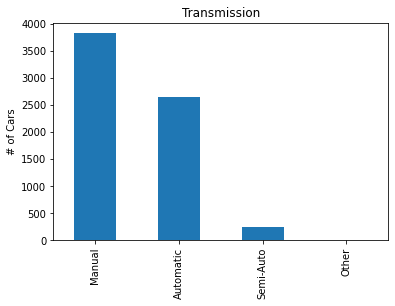

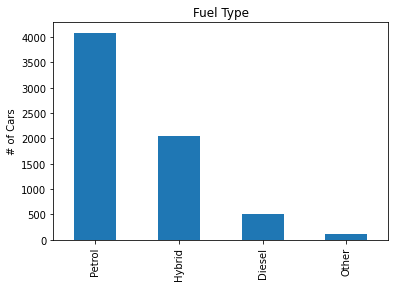

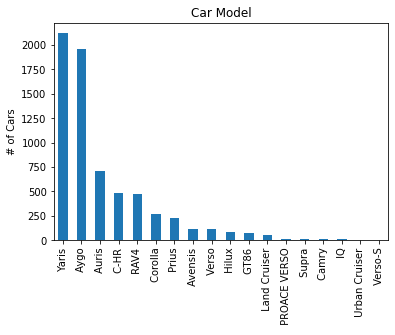

In [ ]:
#We can quickly visualize the findings from value counts with bar plots.
plt.figure()
toyota["transmission"].value_counts().plot(kind='bar')
plt.title("Transmission")
plt.ylabel("# of Cars")
plt.show()

plt.figure()
toyota["fuelType"].value_counts().plot(kind='bar')
plt.title("Fuel Type")
plt.ylabel("# of Cars")
plt.show()

plt.figure()
toyota["model"].value_counts().plot(kind='bar')
plt.title("Car Model")
plt.ylabel("# of Cars")
plt.show()

In [ ]:
# Since 106 rows are small compared to the rest of the data. We decide to exclude "Other" categories from the rest of the data analysis.
filter_condition=(toyota["transmission"]!="Other") & (toyota["fuelType"]!="Other")
toyota=toyota[filter_condition]

## II. Exploratory Data Analysis 

In this section, we dive into data a little bit more and conduct exploratory data analysis to gain insights about the data. We produce some plots to visualize the correlation between price and the rest of the features.

<Figure size 432x288 with 0 Axes>

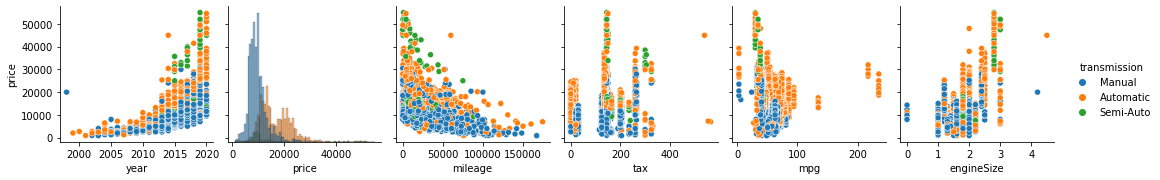

<Figure size 432x288 with 0 Axes>

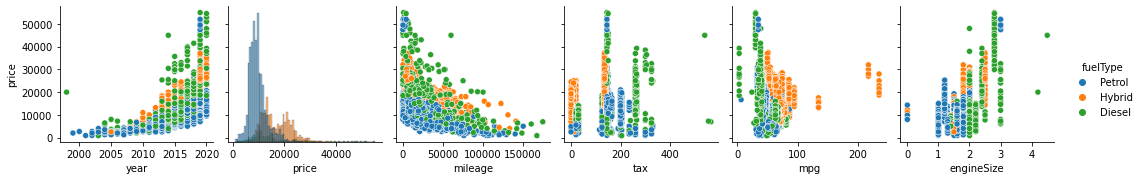

<Figure size 432x288 with 0 Axes>

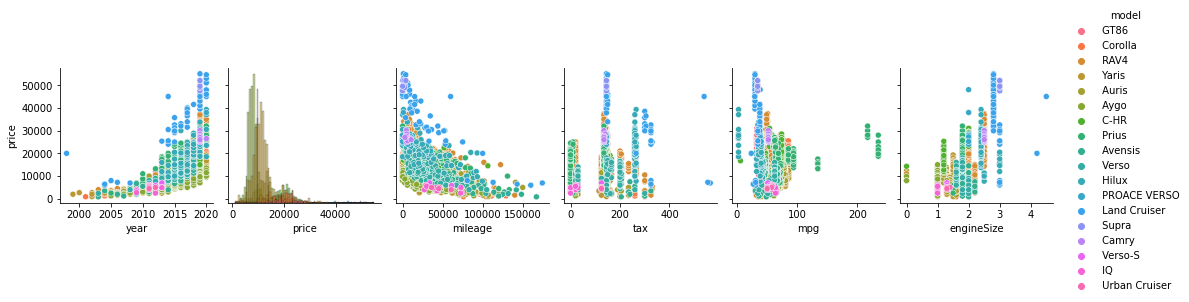

In [ ]:
# We start by producing a pairplot of numerical columns but we are only interested in price as a target value so we set y_variable to price. We plot the same graphs 3 times with the hue set to 3 categorical variables: transmission, fuelType and model.
_=plt.figure()
_=sns.pairplot(toyota,diag_kind="hist",y_vars='price',hue="transmission")
plt.show()
_=plt.figure()
_=sns.pairplot(toyota,diag_kind="hist",y_vars='price',hue="fuelType")
plt.show()
_=plt.figure()
_=sns.pairplot(toyota,diag_kind="hist",y_vars='price',hue="model")
plt.show()

From the graphs we can see that there is some linear correlation between year, mileage and price. We can further confirm this by calculation the correlation matrix of all numeric columns with each other:

In [ ]:
# Calling the .corr() method of toyota DataFrame and rounding to 2 digits.
np.round(toyota.corr(),2)

,year,price,mileage,tax,mpg,engineSize
year,1.00,0.42,-0.73,0.28,-0.02,-0.05
price,0.42,1.00,-0.30,0.21,-0.05,0.73
mileage,-0.73,-0.30,1.00,-0.20,0.05,0.18
tax,0.28,0.21,-0.20,1.00,-0.45,0.16
mpg,-0.02,-0.05,0.05,-0.45,1.00,-0.11
engineSize,-0.05,0.73,0.18,0.16,-0.11,1.00


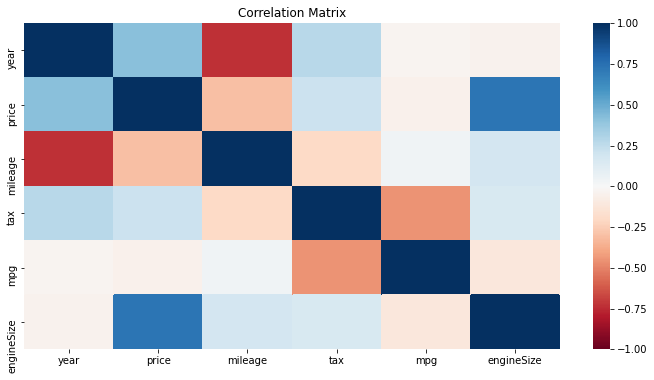

In [ ]:
# We can plot the same matrix as a heatmap for better visualization.
plt.figure(figsize=(12,6))
sns.heatmap(toyota.corr(), 
        xticklabels=toyota.corr().columns,
        yticklabels=toyota.corr().columns, cmap='RdBu',vmax=1,vmin=-1)
plt.title("Correlation Matrix")
plt.show()

engineSize, year and tax are positively correlated with price whereas mileage is negatively correlated.

MilesPerGallon(mpg) doesn't seem to be linearly correlated but this doesn't mean that there is no higher order dependence!

We can do similar EDA to categorical variables (transmission,fuelType and model) by using boxplots.

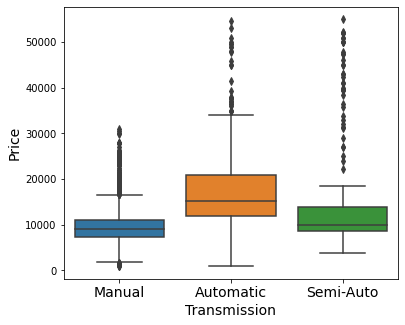

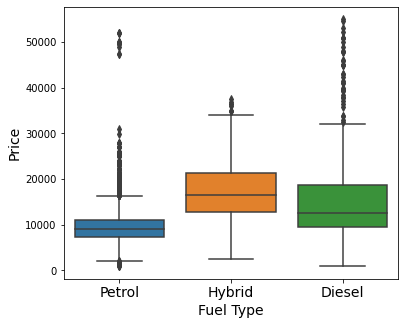

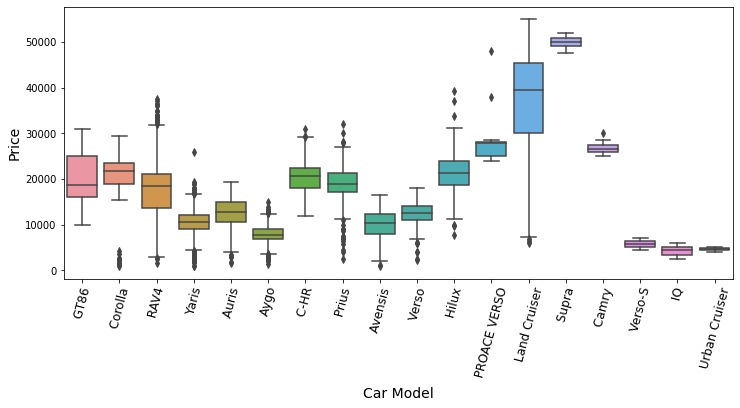

In [ ]:
# Plotting the categorical variables "transmisson", "fuelType" and "model"
fig,ax=plt.subplots(figsize=(6,5))
ax=sns.boxplot(x='transmission',y='price',data=toyota)
ax.set_xticklabels(ax.get_xticklabels(),size=14)
ax.set_xlabel("Transmission",size=14)
ax.set_ylabel("Price",size=14)
plt.show()
fig,ax=plt.subplots(figsize=(6,5))
sns.boxplot(x='fuelType',y='price',data=toyota)
ax.set_xticklabels(ax.get_xticklabels(),size=14)
ax.set_xlabel("Fuel Type",size=14)
ax.set_ylabel("Price",size=14)
plt.show()
fig,ax=plt.subplots(figsize=(12,5))
ax=sns.boxplot(x='model',y='price',data=toyota)
ax.set_xticklabels(ax.get_xticklabels(),rotation=75,size=12)
ax.set_ylabel("Price",size=14)
ax.set_xlabel("Car Model",size=14)
plt.show()

## III. Implementing ML Models

In this section we implement multiple machine learning models to predict the price of the car. We start by a simple linear model and then improve our scoring metrics decision tree and random forest classifiers.

In [ ]:
# We import the machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error as MSE


In [ ]:
# We drop the price column from dataframe and assing the rest of the parameters to X variable. And price become our target variable y.

toyota=pd.get_dummies(toyota,drop_first=True)
X=toyota.drop(['price'],axis=1)
y=toyota[['price']]

### a. Linear Regression
Here we implement a linear regression model using sklearn and calculate the root mean square error and $R^2$ scoring metrics. Our taks is to reduce RMSE below 1500.
 

In [ ]:
# Training a simple linear model:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
linearmodel=LinearRegression()
linearmodel.fit(X_train,y_train)
y_pred=linearmodel.predict(X_test)
rmse = np.round(np.sqrt(MSE(y_test,y_pred)),2)
print("Root Mean Squared Error: {}".format(rmse))
print("R^2 Score: {}".format(np.round(linearmodel.score(X_test,y_test),3)))

Root Mean Squared Error: 1677.71
R^2 Score: 0.93


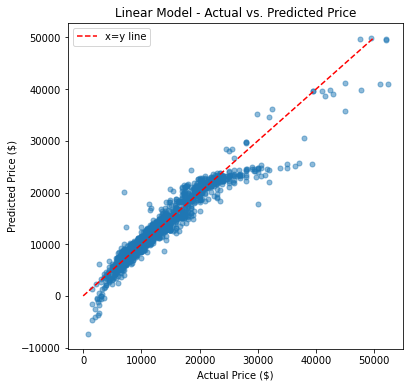

In [ ]:
# Visualazing the RMSE and R^2 score by pltiing actual vs. predicted price
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(y_test,y_pred,"o",markersize=5,alpha=0.5)
ax.plot([0,50000],[0,50000],"r--",label="x=y line")
ax.set_title("Linear Model - Actual vs. Predicted Price")
ax.set_xlabel("Actual Price ($)")
ax.set_ylabel("Predicted Price ($)")
plt.legend()
plt.show()

Linear regression model have RMSE of 1700 and didn't fit our criteria. So we move onto the next model.

### b. Decision Tree Regression
We try to improve our model by switching to a decision tree regression model. We hope that capturing non-linearities will improve our predicting power.

In [ ]:
# Training a decision tree regressor:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
dt=DecisionTreeRegressor(max_depth=15,min_samples_leaf=0.01)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
rmse = np.round(np.sqrt(MSE(y_test,y_pred)),2)
print("Root Mean Squared Error: {}".format(rmse))
print("R^2 Score: {}".format(np.round(dt.score(X_test,y_test),3)))

Root Mean Squared Error: 2077.3
R^2 Score: 0.886


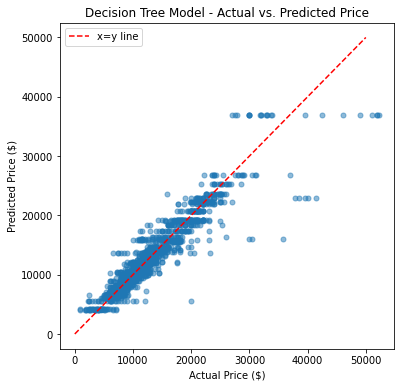

In [ ]:
# Visualazing the RMSE and R^2 score by pltiing actual vs. predicted price
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(y_test,y_pred,"o",markersize=5,alpha=0.5)
ax.plot([0,50000],[0,50000],"r--",label="x=y line")
ax.set_title("Decision Tree Model - Actual vs. Predicted Price")
ax.set_xlabel("Actual Price ($)")
ax.set_ylabel("Predicted Price ($)")
plt.legend()
plt.show()

#### Optimizing Parameters of Decision Tree Regression with grid search Cross-Validation:

Our initial try performed worse than a linear model, but we don't give up yet. We do a grid search to tune our hyper-parameters.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.01)
param_dist = {"max_depth": np.arange(10, 30),
              "min_samples_leaf": np.logspace(-5,-3,num=12)}

tree = DecisionTreeRegressor()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = GridSearchCV(tree , param_dist ,cv=3,verbose=True)
# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(np.round(tree_cv.best_score_,3)))


Fitting 3 folds for each of 240 candidates, totalling 720 fits
Tuned Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 0.00043287612810830614}
Best score is 0.951


In [ ]:
# Training a decision tree regressor with the optimal parameters:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
dt=DecisionTreeRegressor(max_depth=13,min_samples_leaf= 0.00065)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
rmse = np.round(np.sqrt(MSE(y_test,y_pred)),2)
print("Root Mean Squared Error: {}".format(rmse))
print("R^2 Score: {}".format(np.round(dt.score(X_test,y_test),3)))

Root Mean Squared Error: 1381.11
R^2 Score: 0.954


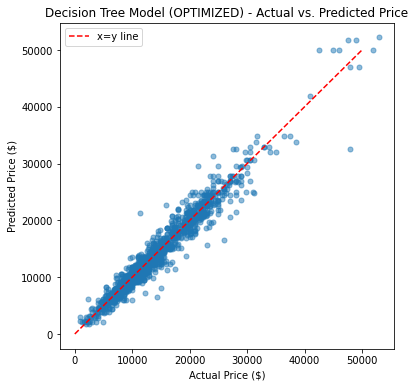

In [ ]:
# Visualazing the RMSE and R^2 score by pltiing actual vs. predicted price after optimization
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(y_test,y_pred,"o",markersize=5,alpha=0.5)
ax.plot([0,50000],[0,50000],"r--",label="x=y line")
ax.set_title("Decision Tree Model (OPTIMIZED) - Actual vs. Predicted Price")
ax.set_xlabel("Actual Price ($)")
ax.set_ylabel("Predicted Price ($)")
plt.legend()
plt.show()

With the optimized hyper-parameters our model performed much better! We are within our target RMSE but we will try to get better one last time.

### c. Random Forest Regression
Lastly, we do our final push to improve our method by ensemble learning. We implement random forest regressor with 500 estimators.

In [ ]:
# Implementing the random forest Regressor with 500 estimators
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

rf=RandomForestRegressor(n_estimators=500,min_samples_leaf= 0.0006)

rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
rmse = np.round(np.sqrt(MSE(y_test,y_pred)),2)
print("Root Mean Squared Error: {}".format(rmse))
print("R^2 Score: {}".format(np.round(rf.score(X_test,y_test),3)))

Root Mean Squared Error: 1186.17
R^2 Score: 0.966


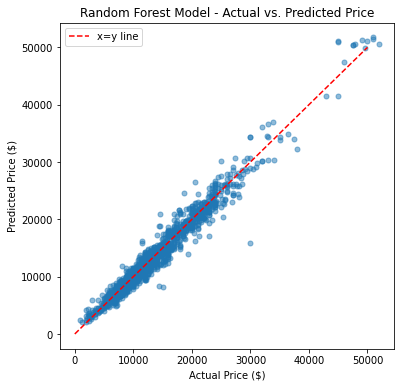

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(y_test,y_pred,"o",markersize=5,alpha=0.5)
ax.plot([0,50000],[0,50000],"r--",label="x=y line")
ax.set_title("Random Forest Model - Actual vs. Predicted Price")
ax.set_xlabel("Actual Price ($)")
ax.set_ylabel("Predicted Price ($)")
plt.legend()
plt.show()

Random forest regressor perfomed better than a single decision tree as expected. Now we are well below the target RMSE. We can gain one last insight by looking at the feature importances of our regressor and learn why it performed significantly better than the linear model.

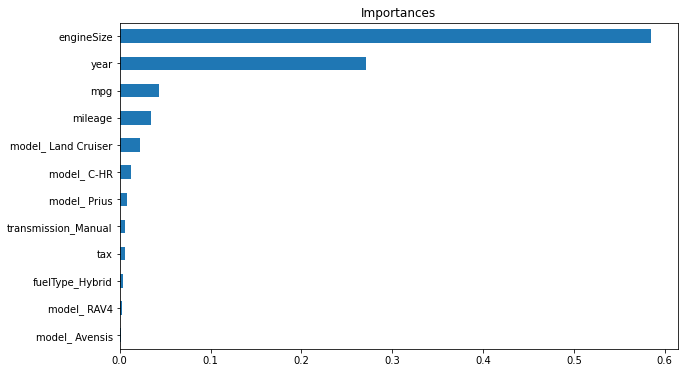

In [ ]:
importances_rf=pd.Series(rf.feature_importances_,index=X.columns)
sorted_importances_rf=importances_rf.sort_values(ascending=True)[-12:]
sorted_importances_rf.plot(kind='barh',figsize=(10,6))
plt.title("Importances")
plt.show()

EngineSize, year and milesPerGallon (mpg) are the most 3 important features. If you remember the linear correlation matrix, mpg had almost zero 'linear' correlation with the price, but that doesn't mean there is no higher order correlation. Our random forest regressor was able to capture the non-linearity and performed better than the linear regression model.